In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv


> # Loading Packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

> # Data

* Age : Customers Age
* Diabetes : Wheather the customer has diabetes 
* Blood Pressure Problems : wheather the customer has abnormal blood pressure problem
* Any Transplants: Any organ Transplant
* Any Chronic Disease : wheather the customer suffers from chronic disease
* Height : Height of customer
* Weight : Weight of Customer
* Known Allergies : wheather the customer has any known allergies
* History Of Cancer In Family : wheather the customers any blood relative has had any form of cancer
* Number of Major Surgeries : Number of surgries 
* Premium Price : Yearly Premium Price

> # Reading Data

In [3]:
df=pd.read_csv('/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


> # Dimension of Data 

In [4]:
df.shape

(986, 11)

The data contains 986 rows and 11 columns

In [5]:
org_data=df.copy()

> # Features of Data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


as we can see all the varibles in this dataset are numeric

> # Missing Data 

In [7]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

There is no null values in this dataset

In [8]:
df['PremiumPrice'].describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

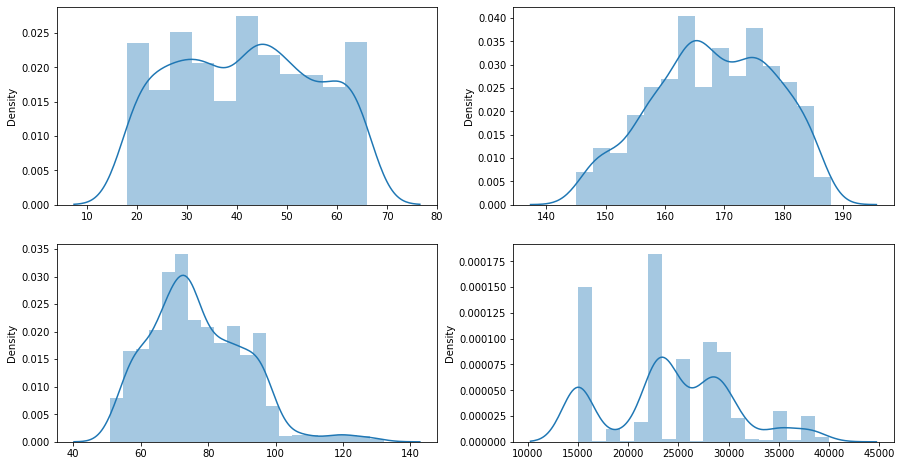

In [9]:
figure,axes=plt.subplots(2,2,figsize=(15,8))
cols=[['Age','Height'],['Weight','PremiumPrice']]
for i in range(len(cols)):
    for j in range(len(cols)):
        sns.distplot(x=df[cols[i][j]],ax=axes[i,j])

<AxesSubplot:xlabel='PremiumPrice'>

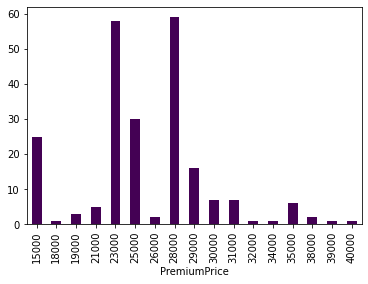

In [10]:
d=df[(df['Diabetes']==1) & (df['BloodPressureProblems']==1)]
d.groupby('PremiumPrice')['Age'].count().plot(kind='bar',cmap='viridis')


most customers suffering with diabetes and blood pressure problem are paying 23000 or 28000 premimum price of insurance

<AxesSubplot:xlabel='PremiumPrice'>

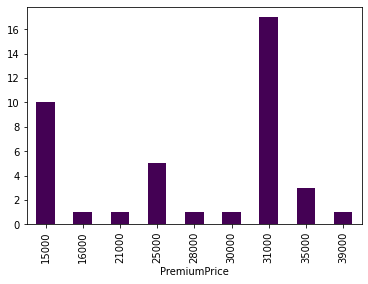

In [11]:
d1=df[(df['HistoryOfCancerInFamily']==1) & (df['KnownAllergies']==1)]
d1.groupby('PremiumPrice')['Age'].count().plot(kind='bar',cmap='viridis')

customers having history of cancer in family and allergies are mostly paying 31000 premium price of insurance

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

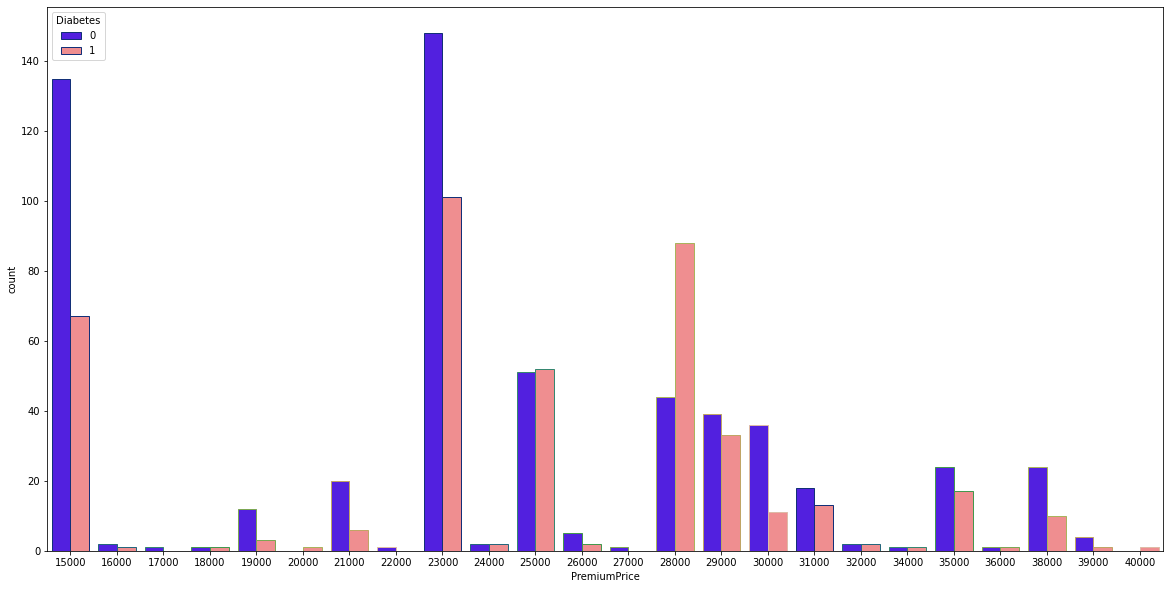

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['Diabetes'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

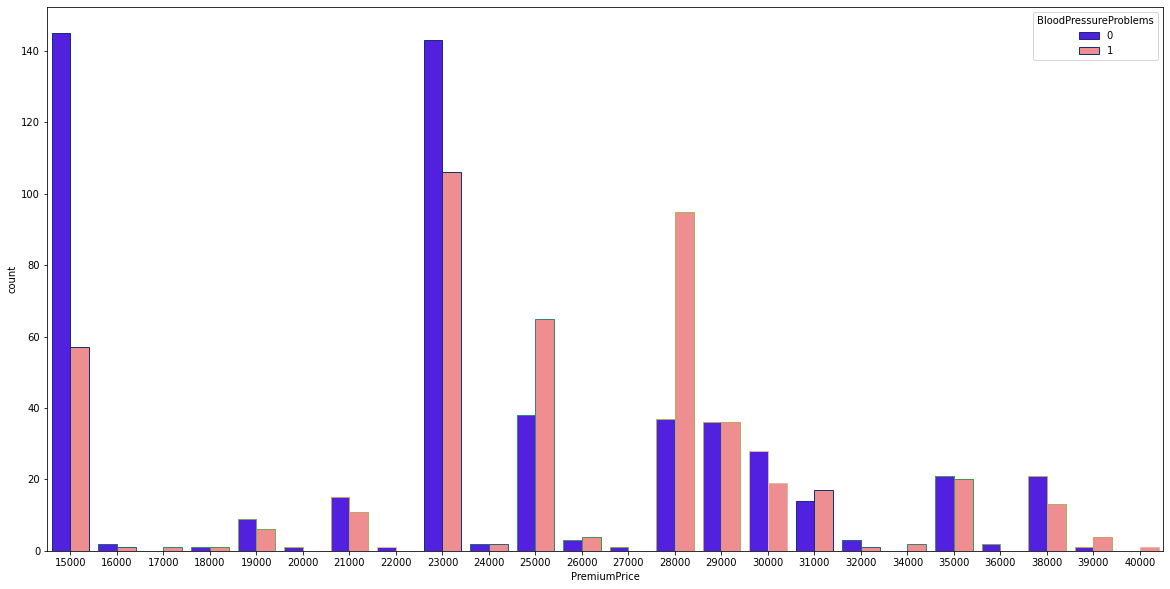

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['BloodPressureProblems'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

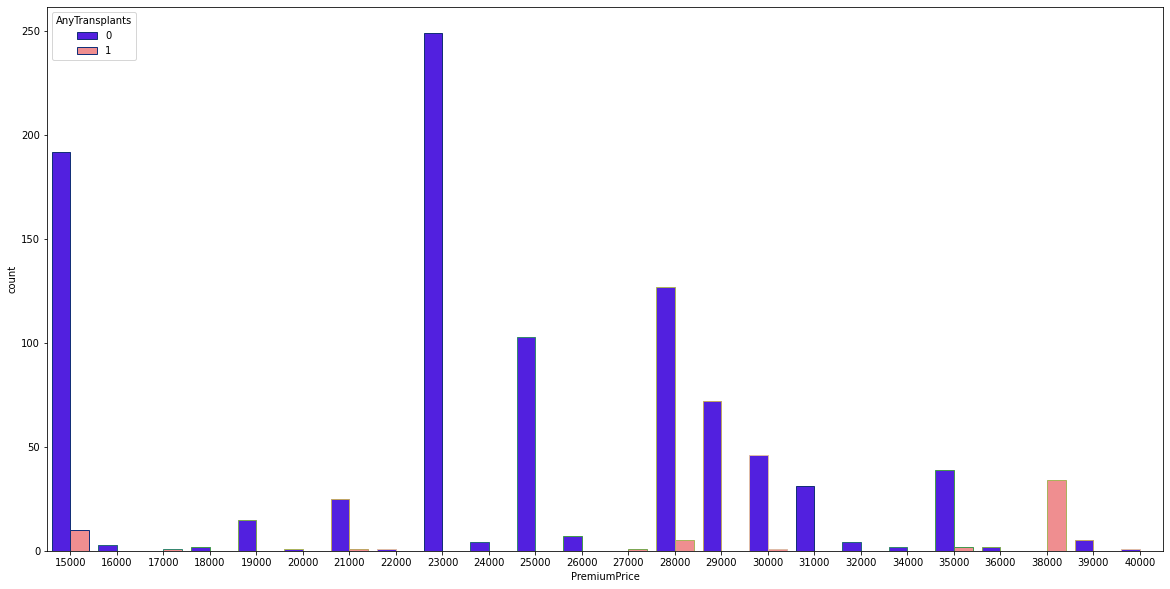

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['AnyTransplants'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

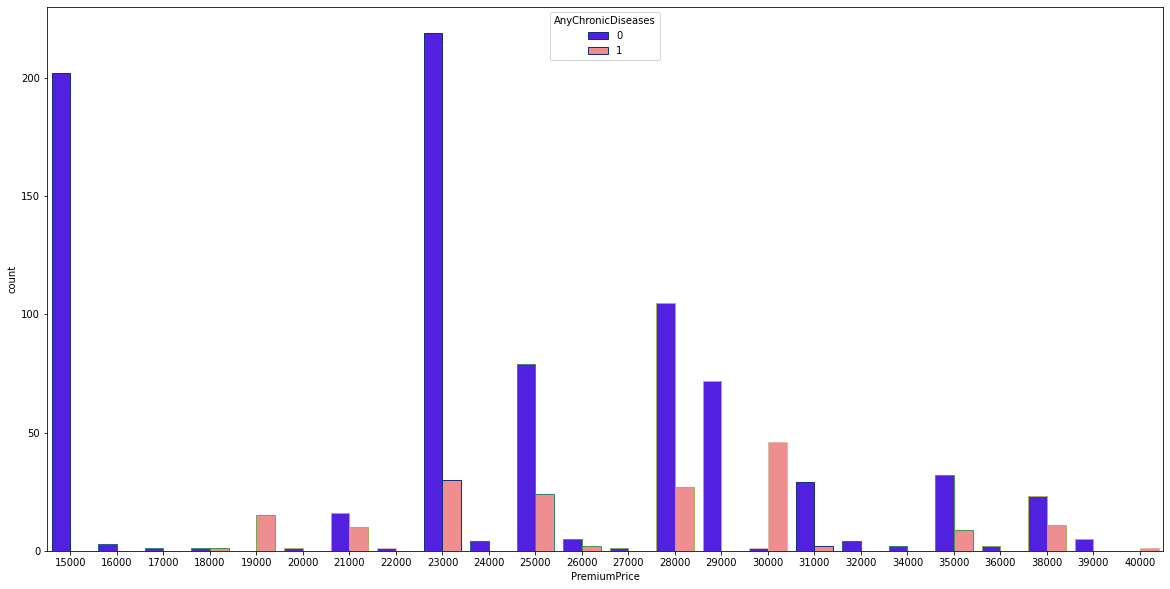

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['AnyChronicDiseases'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

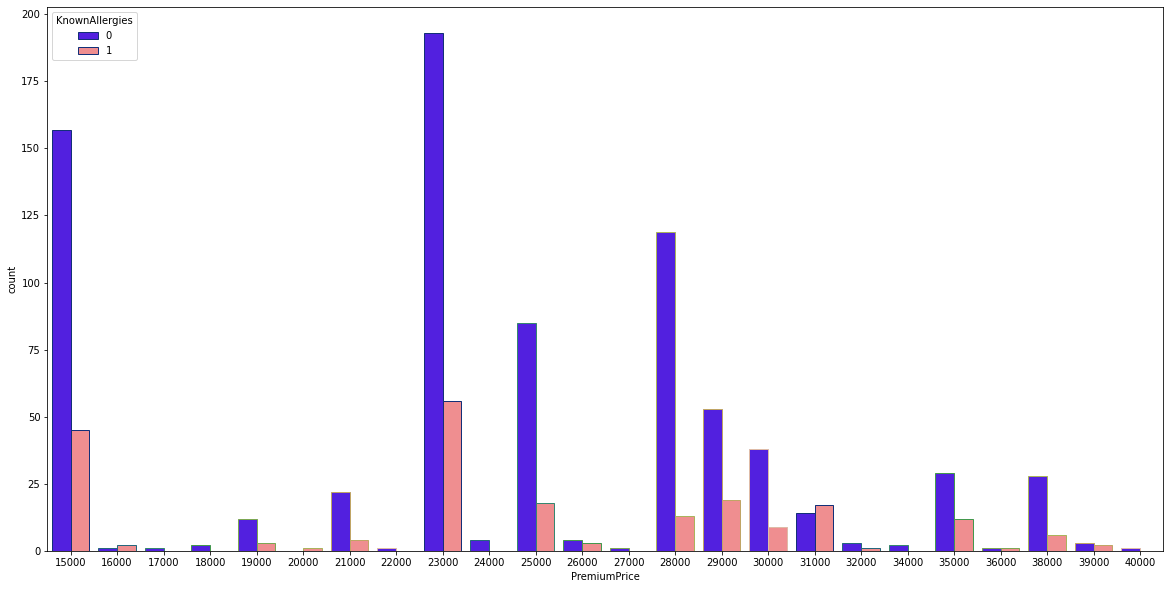

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['KnownAllergies'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

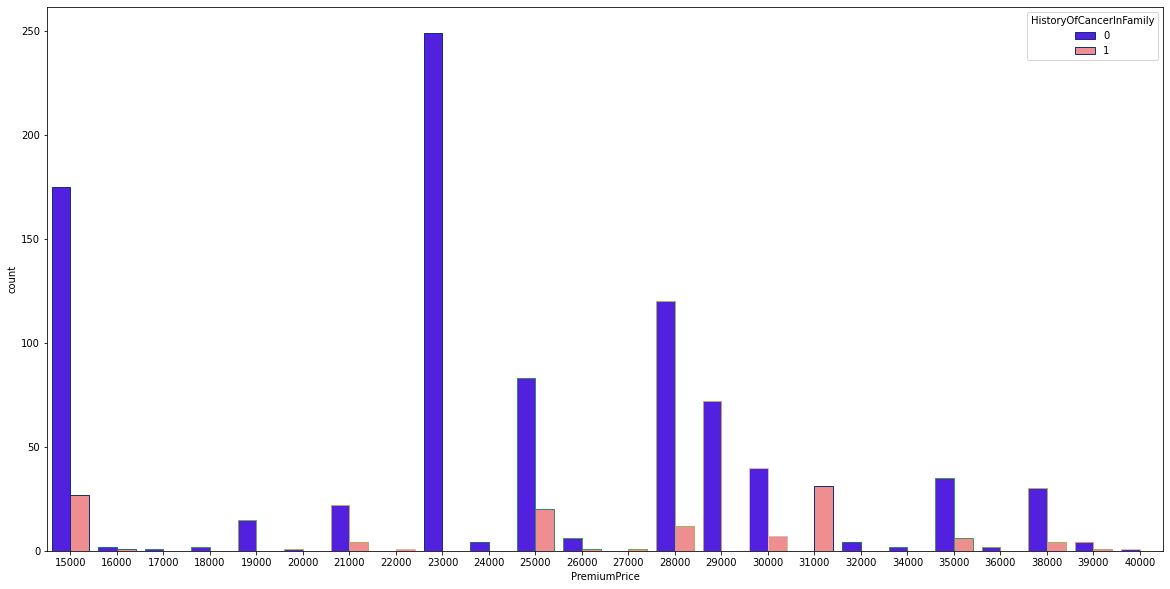

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['HistoryOfCancerInFamily'],palette="gnuplot2",edgecolor=sns.color_palette("gist_earth", 8))

average premium price of insurance is 23000

<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

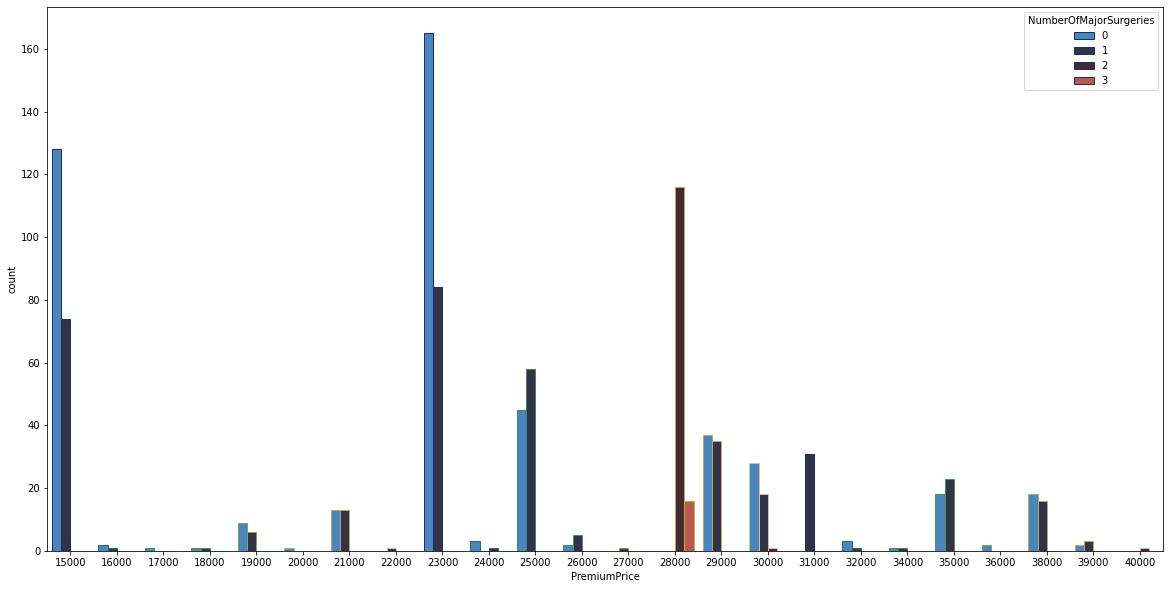

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['PremiumPrice'],hue=df['NumberOfMajorSurgeries'],palette="icefire",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='Age'>

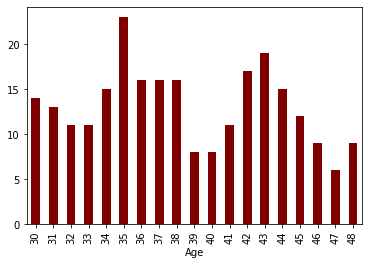

In [19]:
price=df[df['PremiumPrice']==23000]
price.groupby('Age')['PremiumPrice'].count().plot(kind='bar',cmap='jet_r')

<AxesSubplot:xlabel='Height'>

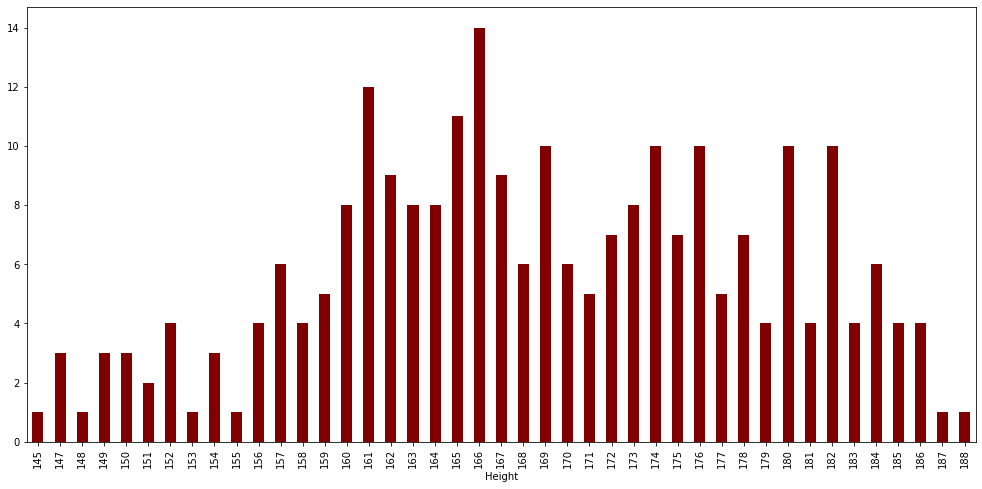

In [20]:
plt.figure(figsize=(17,8))
price.groupby('Height')['PremiumPrice'].count().plot(kind='bar',cmap='jet_r')

<AxesSubplot:xlabel='Weight'>

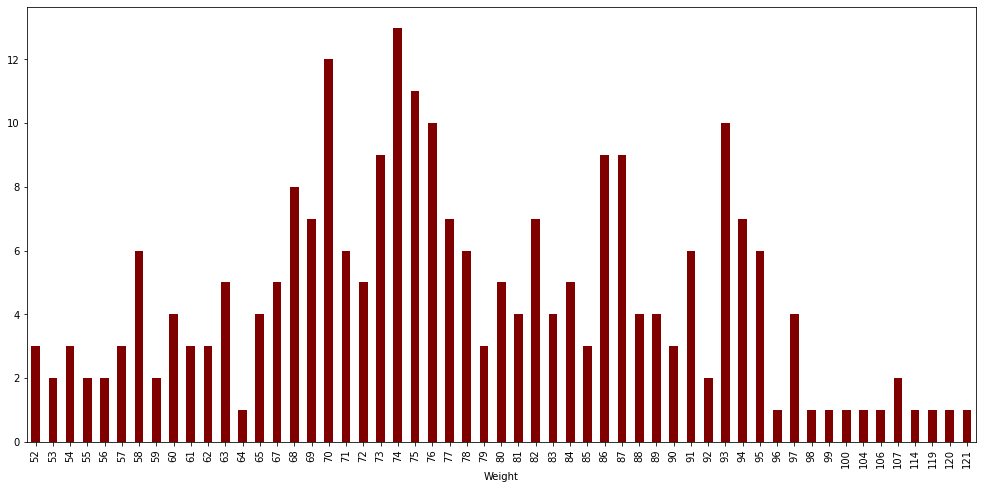

In [21]:
plt.figure(figsize=(17,8))
price.groupby('Weight')['PremiumPrice'].count().plot(kind='bar',cmap='jet_r')

<AxesSubplot:xlabel='Age', ylabel='count'>

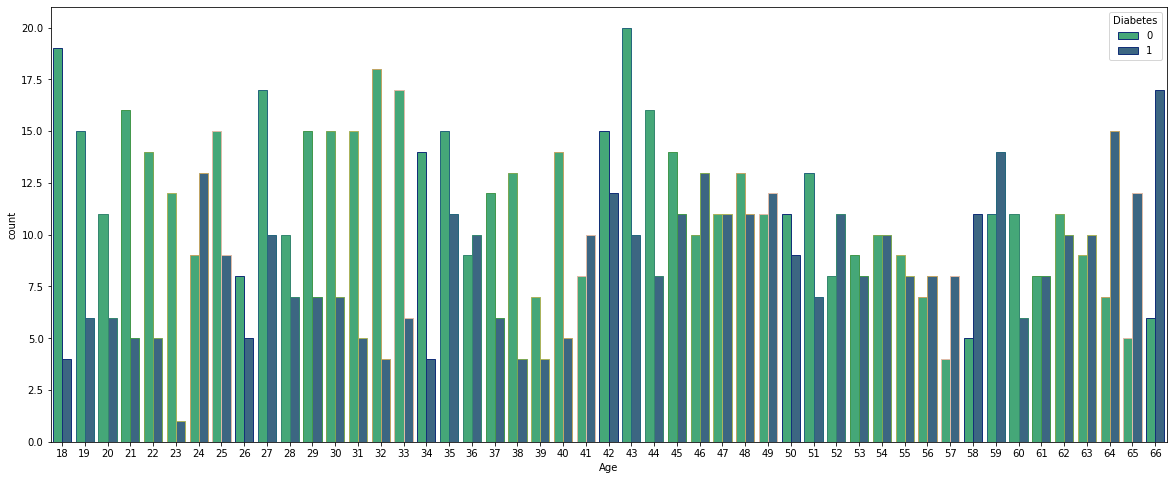

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['Diabetes'],palette="viridis_r",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='Age', ylabel='count'>

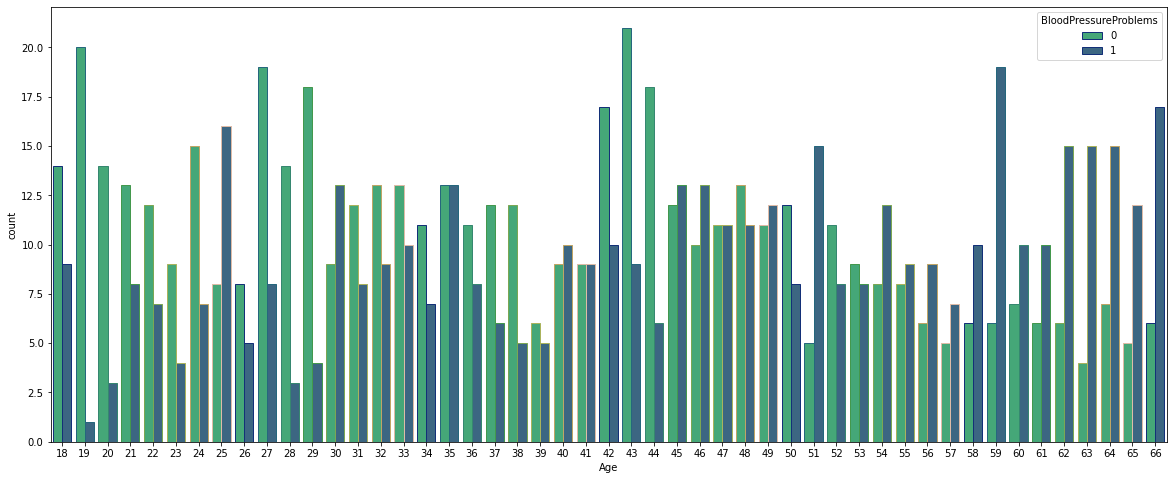

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['BloodPressureProblems'],palette="viridis_r",edgecolor=sns.color_palette("gist_earth", 8))

<AxesSubplot:xlabel='Age', ylabel='count'>

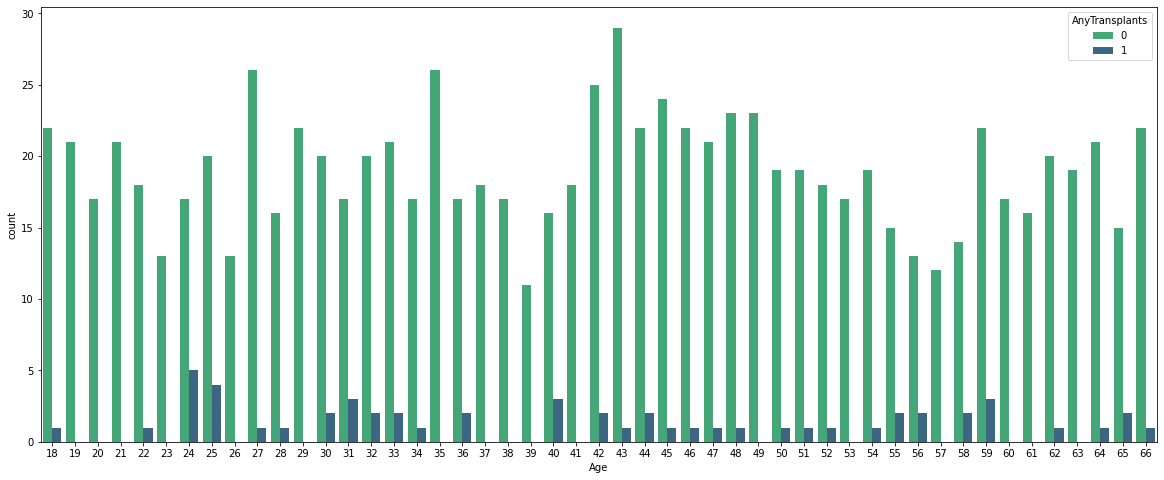

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['AnyTransplants'],palette="viridis_r")

<AxesSubplot:xlabel='Age', ylabel='count'>

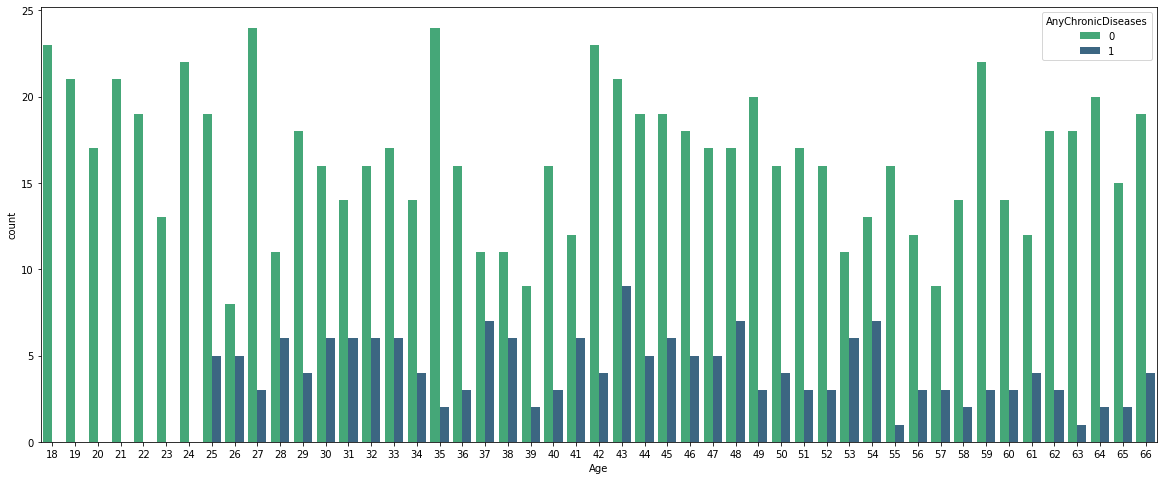

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['AnyChronicDiseases'],palette="viridis_r")

<AxesSubplot:xlabel='Age', ylabel='count'>

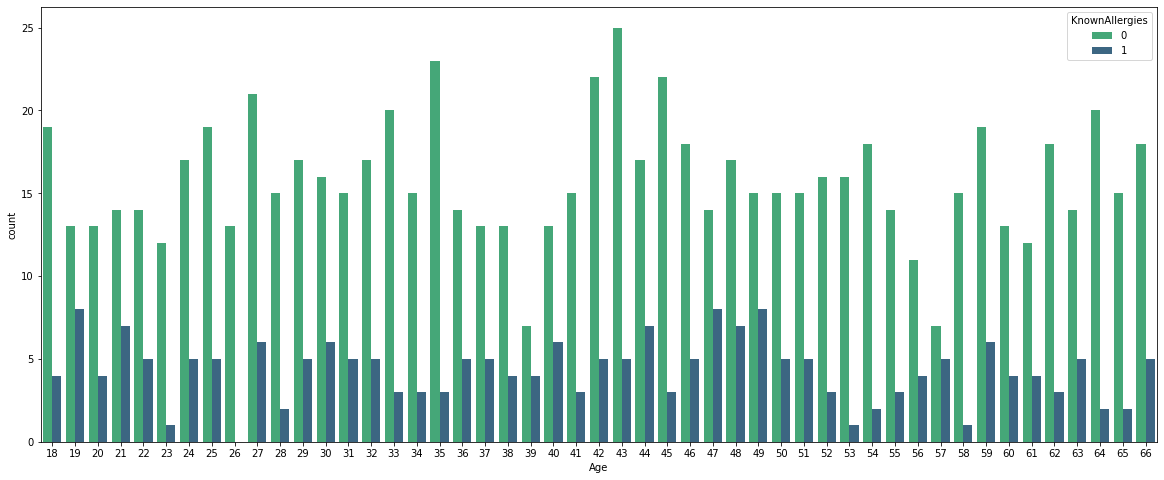

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['KnownAllergies'],palette="viridis_r")

<AxesSubplot:xlabel='Age', ylabel='count'>

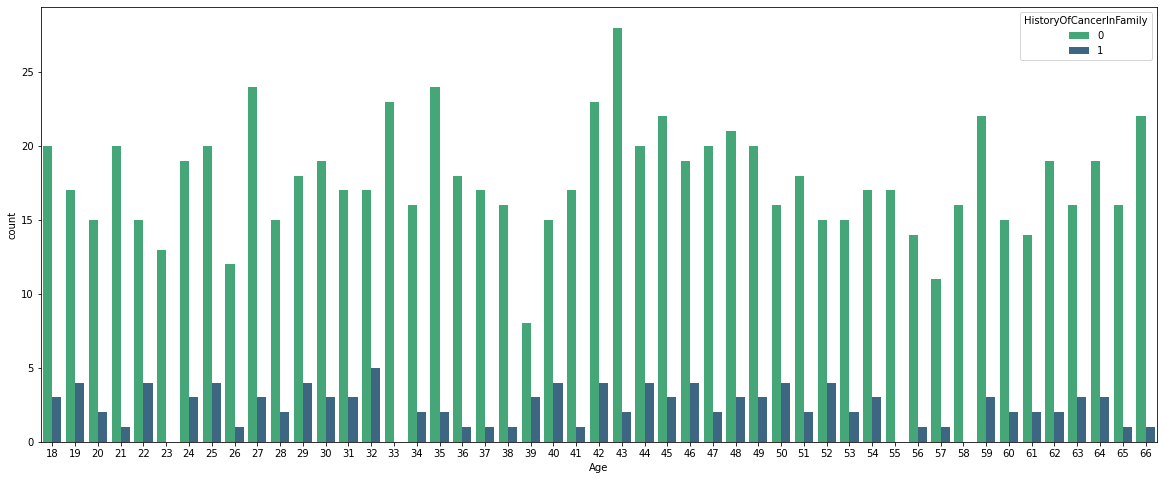

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['HistoryOfCancerInFamily'],palette="viridis_r")

<AxesSubplot:xlabel='Age', ylabel='count'>

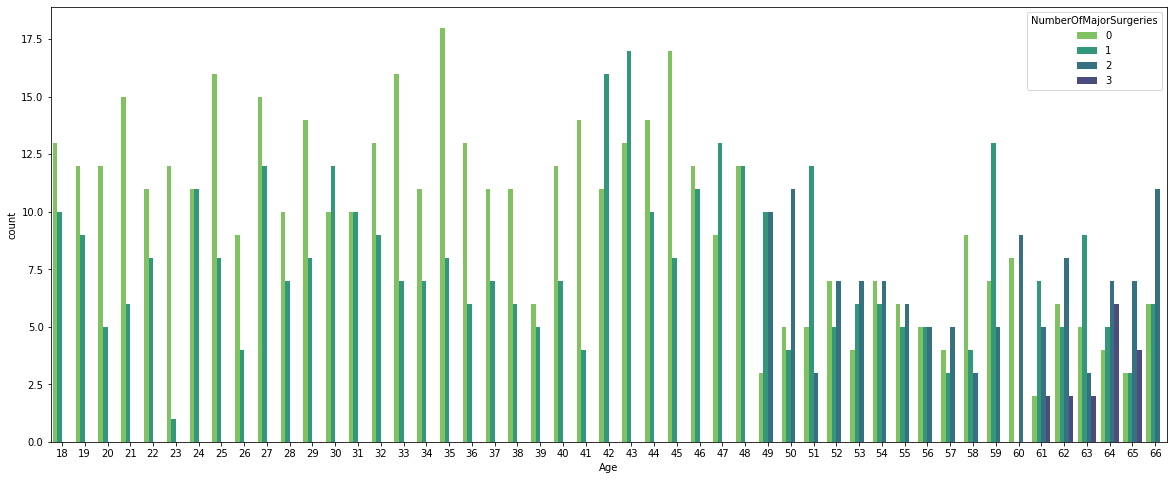

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['NumberOfMajorSurgeries'],palette="viridis_r")

<AxesSubplot:xlabel='PremiumPrice', ylabel='Age'>

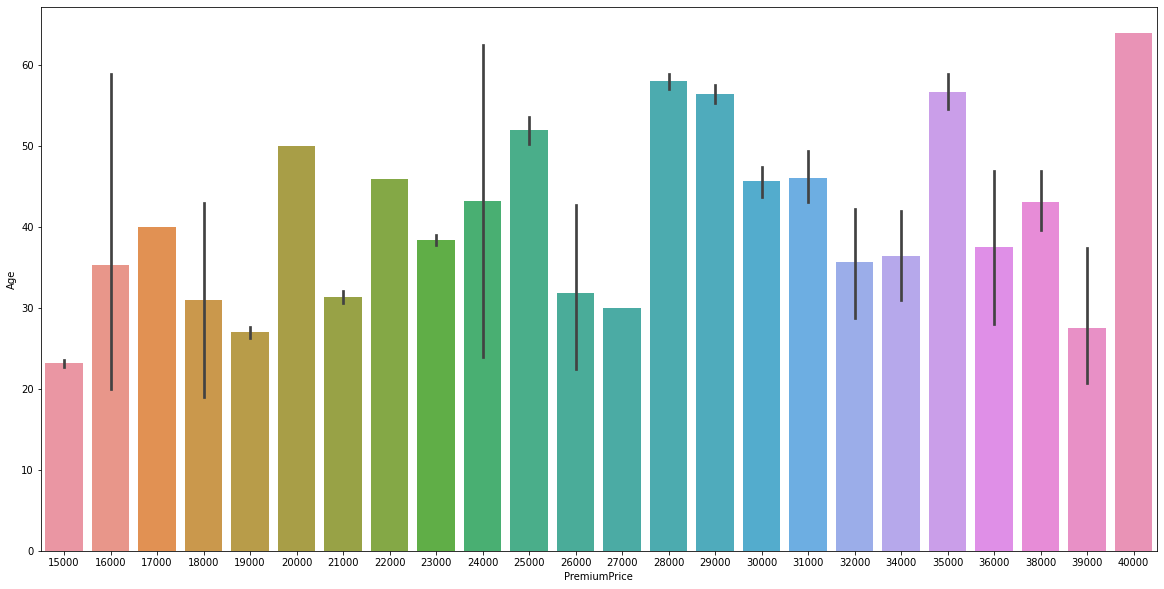

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['PremiumPrice'],y=df['Age'])

<AxesSubplot:xlabel='PremiumPrice'>

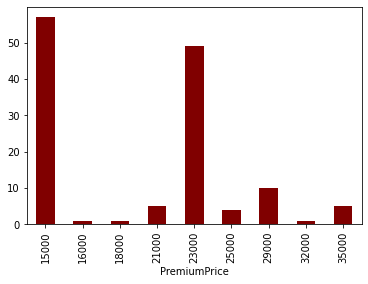

In [30]:
h=df[(df['Diabetes']==0)&(df['BloodPressureProblems']==0)&(df['AnyTransplants']==0)&(df['AnyChronicDiseases']==0)&(df['KnownAllergies']==0)&(df['HistoryOfCancerInFamily']==0)&(df['NumberOfMajorSurgeries']==0)]
h.groupby('PremiumPrice')['Age'].count().plot(kind='bar',cmap='jet_r')

<AxesSubplot:xlabel='Age'>

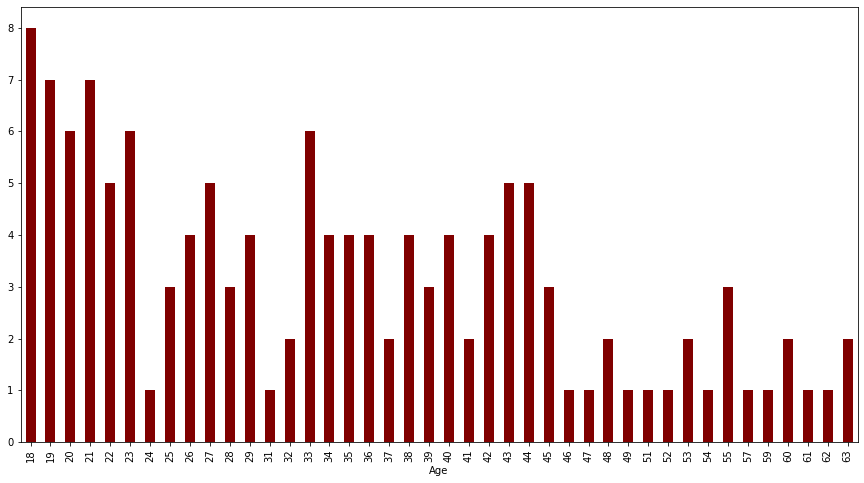

In [31]:
plt.figure(figsize=(15,8))
h.groupby('Age')['PremiumPrice'].count().plot(kind='bar',cmap='jet_r')

In [32]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
